In [141]:
# basic libraries 
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
#machine learning 
from sklearn.cluster import KMeans 

In [142]:
df = pd.read_csv('iris.csv')

In [143]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [144]:
x = df.iloc[:, [0, 1, 2, 3]].values

# Exploring data

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Greate ! there's no missing values 

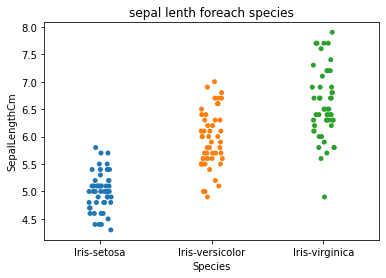

In [41]:
sns.stripplot(x='Species',y='SepalLengthCm',data=df)
plt.title('sepal lenth foreach species');

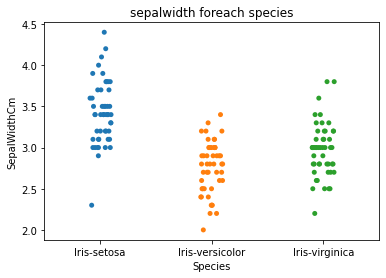

In [42]:
sns.stripplot(x='Species',y='SepalWidthCm',data=df)
plt.title('sepalwidth foreach species');

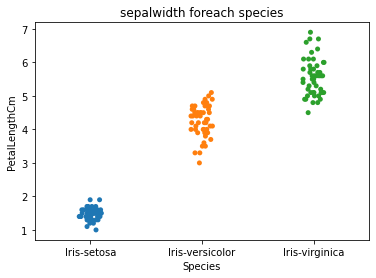

In [44]:
sns.stripplot(x='Species',y='PetalLengthCm',data=df)
plt.title('sepalwidth foreach species');

# Building a Model

In [50]:
ks = range(1,11)
inertias = []
for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(x)
    inertias.append(model.inertia_)

C:\Users\NEW TOP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


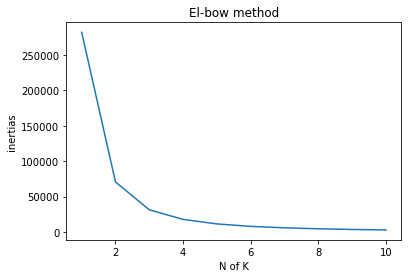

In [58]:
plt.plot(range(1,11),inertias)
plt.title('El-bow method')
plt.xlabel('N of K')
plt.ylabel('inertias')
plt.show()

it seems  like k = 3

# Iterate

In [59]:
model = KMeans(n_clusters=3)
model.fit(x)
labels=model.predict(x)

In [62]:
labels 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

[0 first cluster 1 second cluster and 2 thrid cluster]

let's draw that down

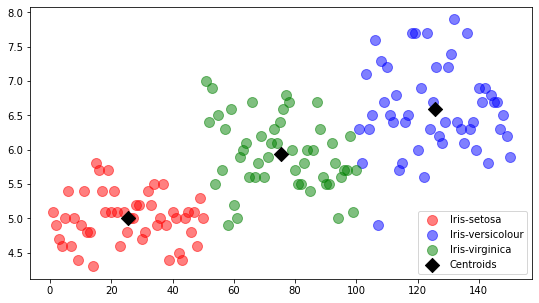

In [135]:
fig,ax=plt.subplots(figsize=(9,5))
plt.scatter(x[labels == 0, 0], x[labels == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa',alpha=0.5)
plt.scatter(x[labels == 1, 0], x[labels == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour',alpha=0.5)
plt.scatter(x[labels == 2, 0], x[labels == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica',alpha=0.5)

# Plotting the centroids of the clusters
plt.scatter(model.cluster_centers_[:, 0],model.cluster_centers_[:,1], 
            s = 100,label = 'Centroids',marker='D',color='black')

plt.legend(loc='lower right');